In [2]:
import scipy.io
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib notebook
warnings.filterwarnings('ignore')

mat = scipy.io.loadmat('sintesis.mat')
mat.pop('__header__')
mat.pop('__version__')
mat.pop('__globals__')

B = mat['ganancia'][0]
a_i = mat['coef']
x_n = mat['excit']

# Apartat A

<StemContainer object of 3 artists>

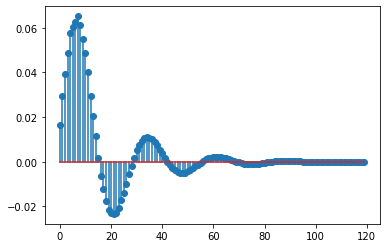

In [3]:
dK = np.array([1]+[0]*119)
h_n = scipy.signal.lfilter([B[99]], a_i[99], dK, axis= -1, zi=None)
plt.close('all')
plt.stem(range(120), h_n)

resposta impulsional (fig 2) la qual té mida 120.

# Apartat B

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.65224929e-02
  2.92631627e-02  3.90917218e-02  4.87172707e-02  5.78444649e-02
  6.05238615e-02  6.27479092e-02  6.51837865e-02  6.12023729e-02
  5.47841777e-02  4.86925765e-02  4.03464370e-02  2.94274450e-02
  2.04563519e-02  1.16019821e-02  1.57334008e-03 -6.39487783e-03
 -1.21428010e-02 -1.77275552e-02 -2.17134347e-02 -2.28889634e-02
 -2.33539516e-02 -2.29796682e-02 -2.05033039e-02 -1.72234619e-02
 -1.40657629e-02 -1.00007984e-02 -5.50940371e-03 -1.80941909e-03
  1.68685350e-03  5.16680

<StemContainer object of 3 artists>

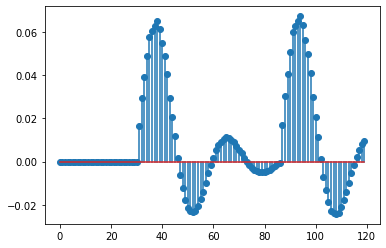

In [48]:
y_n = scipy.signal.lfilter([B[99]], a_i[99], x_n[99], axis= -1, zi=None)
plt.close('all')
plt.stem(range(120), y_n)

# Apartat C

<class 'numpy.ndarray'>


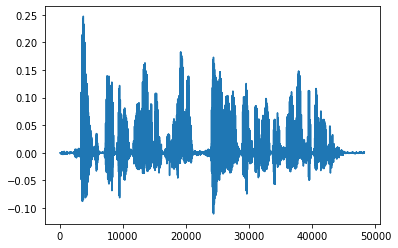

In [58]:
salida = np.array([0.0 for i in range(120)])
print(type(salida))
for n in range(401):
    salida = np.append(salida, scipy.signal.lfilter([B[n]], a_i[n], x_n[n], axis= -1, zi=None))

plt.close('all')
plt.plot(range(120*402), salida)

In [60]:
import sounddevice as sd

sd.play(salida, 120*402)